In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata_33613_3y.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,1044386,2018-90915,BATTERY,BATTERY-SIMPLE,02/06/2018,2100 BLOCK 142ND AV E,33613
1,1044512,2018-93250,BATTERY,BATTERY-SIMPLE,02/07/2018,2200 BLOCK CEDAR TRACE CR,33613
2,1047088,2018-118207,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,02/17/2018,3800 BLOCK WOODSPRING LN,33613
3,1047383,2018-122974,THEFT,SHOPLIFTING,02/19/2018,15300 BLOCK NEBRASKA AV N,33613
4,1048296,2018-131681,DRUGS,DRUG TRAFFICKING/DELIVERY,02/22/2018,1000 BLOCK SKIPPER RD,33613
5,1049023,2018-138998,BATTERY,BATTERY-SIMPLE,02/25/2018,14300 BLOCK NEBRASKA AV N,33613
6,1049298,2018-141331,THEFT,THEFT MOTOR VEHICLE PARTS,02/26/2018,200 BLOCK SOUTH PINE DR,33613
7,1052212,2018-168750,TRAFFIC,Non Incapacitating Injury,03/09/2018,FLORIDA AV N / BEARSS AV W,33613
8,1055959,2018-206165,THEFT,PETIT THEFT - ALL OTHER,03/25/2018,1200 BLOCK 142ND AV E,33613
9,1056849,2018-217429,THEFT,SHOPLIFTING,03/29/2018,13500 BLOCK FLORIDA AV N,33613


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/06/2018,2018-90915,BATTERY,BATTERY-SIMPLE,33613
1,02/07/2018,2018-93250,BATTERY,BATTERY-SIMPLE,33613
2,02/17/2018,2018-118207,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613
3,02/19/2018,2018-122974,THEFT,SHOPLIFTING,33613
4,02/22/2018,2018-131681,DRUGS,DRUG TRAFFICKING/DELIVERY,33613
5,02/25/2018,2018-138998,BATTERY,BATTERY-SIMPLE,33613
6,02/26/2018,2018-141331,THEFT,THEFT MOTOR VEHICLE PARTS,33613
7,03/09/2018,2018-168750,TRAFFIC,Non Incapacitating Injury,33613
8,03/25/2018,2018-206165,THEFT,PETIT THEFT - ALL OTHER,33613
9,03/29/2018,2018-217429,THEFT,SHOPLIFTING,33613


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/06/2018,2018-90915,BATTERY,BATTERY-SIMPLE,33613
1,02/07/2018,2018-93250,BATTERY,BATTERY-SIMPLE,33613
2,02/17/2018,2018-118207,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613
3,02/19/2018,2018-122974,THEFT,SHOPLIFTING,33613
4,02/22/2018,2018-131681,DRUGS,DRUG TRAFFICKING/DELIVERY,33613
5,02/25/2018,2018-138998,BATTERY,BATTERY-SIMPLE,33613
6,02/26/2018,2018-141331,THEFT,THEFT MOTOR VEHICLE PARTS,33613
8,03/25/2018,2018-206165,THEFT,PETIT THEFT - ALL OTHER,33613
9,03/29/2018,2018-217429,THEFT,SHOPLIFTING,33613
11,04/02/2018,2018-226453,BATTERY,BATTERY-AGGRAVATED,33613


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

750

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ASSAULT      13
BATTERY     172
BURGLARY     91
DRUGS        90
DUI          30
FIRE          1
FRAUD        63
HARASS        1
MISCHIEF     78
MURDER        4
ROBBERY      14
THEFT       193
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
01/01/2021    1
01/02/2019    2
01/02/2021    2
01/03/2019    1
01/04/2020    1
             ..
12/28/2020    2
12/30/2018    3
12/30/2019    1
12/30/2020    1
12/31/2020    2
Name: Case Number, Length: 542, dtype: int64

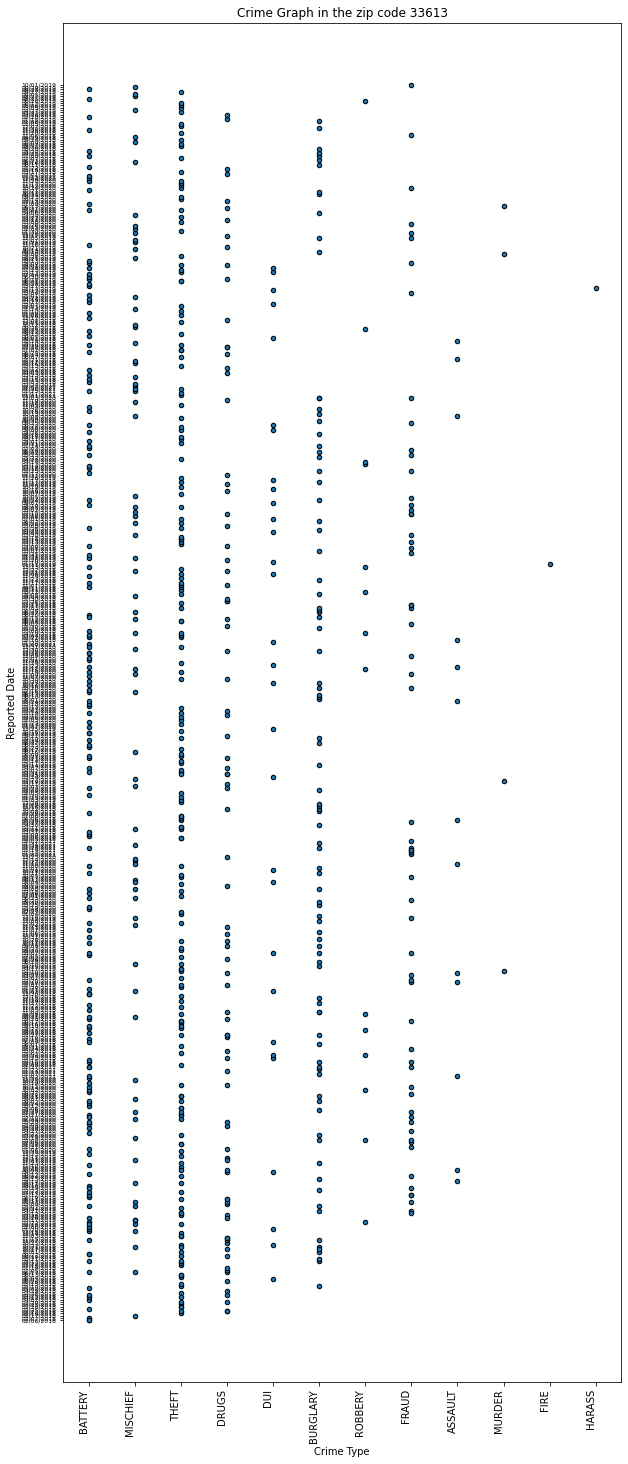

In [8]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33613")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()